Input 

In [1]:
import numpy as np

#X1 X2
sample=np.array([[2.5, 2.4],
      [0.5, 0.7],
      [2.2, 2.9],
      [1.9, 2.2],
      [3.1, 3.0],
      [2.3, 2.7],
      [2, 1.6],
      [1, 1.1],
      [1.5, 1.6],
      [1.1, 1.9]])
samples=sample.reshape(2,10) #reshape into 2 x 10

mean_x = np.mean(samples[0,:])
mean_y = np.mean(samples[1,:])

mean= np.array([[mean_x],[mean_y]])

print('Mean Vector:\n',mean)


Mean Vector:
 [[2.14]
 [1.68]]


Dimentional Mean Vector

In [2]:
scatter_matrix = np.zeros((2,2))
for i in range(samples.shape[1]):
    scatter_matrix += (samples[:,i].reshape(2,1) - mean).dot((samples[:,i].reshape(2,1) - mean).T)
print('Scatter Matrix:\n', scatter_matrix)

Scatter Matrix:
 [[ 7.264 -0.732]
 [-0.732  2.756]]


Computing Scatter Matrix

In [ ]:
cov_mat = np.cov([samples[0,:],samples[1,:]])
print('Covariance Matrix:\n', cov_mat)

Covariance Matrix:
 [[ 0.80711111 -0.08133333]
 [-0.08133333  0.30622222]]


In [ ]:
cov_mat = np.cov([samples[0,:],samples[1,:]])
print('Covariance Matrix:\n', cov_mat)

Covariance Matrix:
 [[ 0.80711111 -0.08133333]
 [-0.08133333  0.30622222]]


Computing eigenvectors and corresponding eigenvalues

In [ ]:
# eigenvectors and eigenvalues for the from the scatter matrix
eig_val_sc, eig_vec_sc = np.linalg.eig(scatter_matrix)

# eigenvectors and eigenvalues for the from the covariance matrix
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)

for i in range(len(eig_val_sc)):
    eigvec_sc = eig_vec_sc[:,i].reshape(1,2).T
    eigvec_cov = eig_vec_cov[:,i].reshape(1,2).T
    assert eigvec_sc.all() == eigvec_cov.all(), 'Eigenvectors are not identical'

    print('Eigenvector {}: \n{}'.format(i+1, eigvec_sc))
    print('Eigenvalue {} from scatter matrix: {}'.format(i+1, eig_val_sc[i]))
    print('Eigenvalue {} from covariance matrix: {}'.format(i+1, eig_val_cov[i]))
    print('Scaling factor: ', eig_val_sc[i]/eig_val_cov[i])
    print(40 * '-')

Eigenvector 1: 
[[ 0.98769992]
 [-0.15636134]]
Eigenvalue 1 from scatter matrix: 7.3798818535952355
Eigenvalue 1 from covariance matrix: 0.819986872621693
Scaling factor:  8.999999999999998
----------------------------------------
Eigenvector 2: 
[[0.15636134]
 [0.98769992]]
Eigenvalue 2 from scatter matrix: 2.6401181464047623
Eigenvalue 2 from covariance matrix: 0.2933464607116402
Scaling factor:  9.000000000000002
----------------------------------------


Checking the eigenvector-eigenvalue calculation

In [ ]:
for i in range(len(eig_val_sc)):
    eigv = eig_vec_sc[:,i].reshape(1,2).T
    np.testing.assert_array_almost_equal(scatter_matrix.dot(eigv), eig_val_sc[i] * eigv,
                                         decimal=6, err_msg='', verbose=True)

Sorting the eigenvectors by decreasing eigenvalues

In [ ]:
for ev in eig_vec_sc:
    numpy.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
    # instead of 'assert' because of rounding errors

In [ ]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val_sc[i]), eig_vec_sc[:,i]) for i in range(len(eig_val_sc))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i[0])

7.3798818535952355
2.6401181464047623


Choosing k eigenvectors with the largest eigenvalues

In [ ]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(2,1)))
print('Matrix W:\n', matrix_w)

Matrix W:
 [ 0.98769992 -0.15636134]


Transforming sample into the new subspace

In [ ]:
transformed = matrix_w.T.dot(samples)
transformed.reshape(1,10)

array([[2.10961873, 1.9483042 , 0.18112729, 0.44121181, 2.01657849,
        2.6923323 , 1.64208785, 1.92276169, 2.88987228, 2.66601322]])

Text(0.5, 1.0, 'Transformed samples')

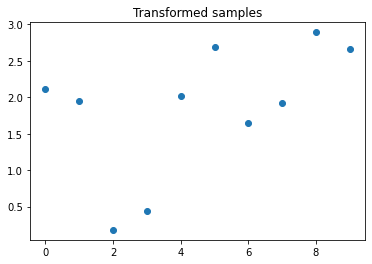

In [ ]:
from matplotlib import pyplot as pyplot

plt.plot(transformed,'o')
plt.title('Transformed samples')
